In [1]:
import pandas as pd
import numpy as np
import configs as c
import matplotlib.pyplot as plt
import common_functions as func

ModuleNotFoundError: No module named 'configs'

In [14]:

def plot_prop_dr(inc_adj, stages, save_imgs=False, outpath=None, timestamp=None):
    """Plotting yearly incidence by stage, and dots for the total inc proportion"""
    calibration_proportions = stages
    model_total_inc = np.sum(inc_adj.iloc[6:9, :65], axis=0)
    model_proportions = [
        np.sum((inc_adj.iloc[stage, :65]) / np.sum(model_total_inc))*100
        for stage in [6, 7, 8]
    ]
    
    x = ['HGPS', 'Model']
    
    # Separate the stages into distinct arrays for plotting
    local = [calibration_proportions[0], model_proportions[0]]
    regional = [calibration_proportions[1], model_proportions[1]]
    distant = [calibration_proportions[2], model_proportions[2]]
    
    # Plot the bars with proper stacking
    plt.bar(x, local, color="b", label="Local")
    plt.bar(x, regional, bottom=local, color='r', label="Regional")
    plt.bar(x, distant, bottom=[i+j for i, j in zip(local, regional)], color='g', label="Distant")

    # Customize the plot
    plt.ylabel("Percent")
    plt.title("Model vs Calibration Target - Cumulative Stage Distribution")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Save or show the plot
    if save_imgs:
        plt.savefig(f"{outpath}/{timestamp}_inc_stage.png")  # Save figure
        plt.close()
    else:
        plt.show()

In [15]:
dr = pd.read_csv("../out/DR/interp/logs/20240924_2053_inc_adj.csv")
dr2 = pd.read_csv("../out/DR/interp/logs/20240924_2053_inc_unadj.csv")

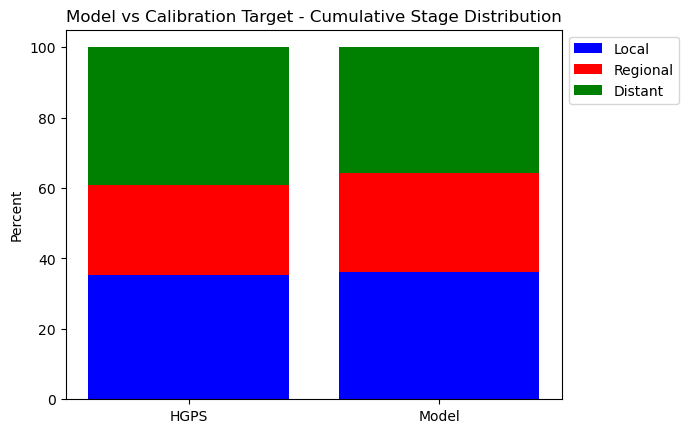

In [16]:
plot_prop_dr(dr, c.dr_stage_dist, save_imgs=False)

In [3]:
us_tmat = np.load("../out/US/interp/tmats/20241001_1624_tmat.npy")

out = np.zeros((8,80))
for idx, (from_state, to_state) in enumerate(c.points):
    out[idx] = us_tmat[:, from_state, to_state]
    
pd.DataFrame(out).to_csv("../out/US/interp/tmats/20241001_1624_tps.csv")

In [21]:
dr_tmat = np.load("../out/DR/interp/tmats/20240924_2148_tmat.npy")

out = np.zeros((8,80))
for idx, (from_state, to_state) in enumerate(c.points):
    out[idx] = dr_tmat[:, from_state, to_state]
    
pd.DataFrame(out).to_csv("../out/DR/interp/tmats/20240924_2148_tps.csv")